### TRYING BETTER MODELS

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
data = pd.read_csv('datasets_4458_8204_winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Figure size 720x360 with 0 Axes>

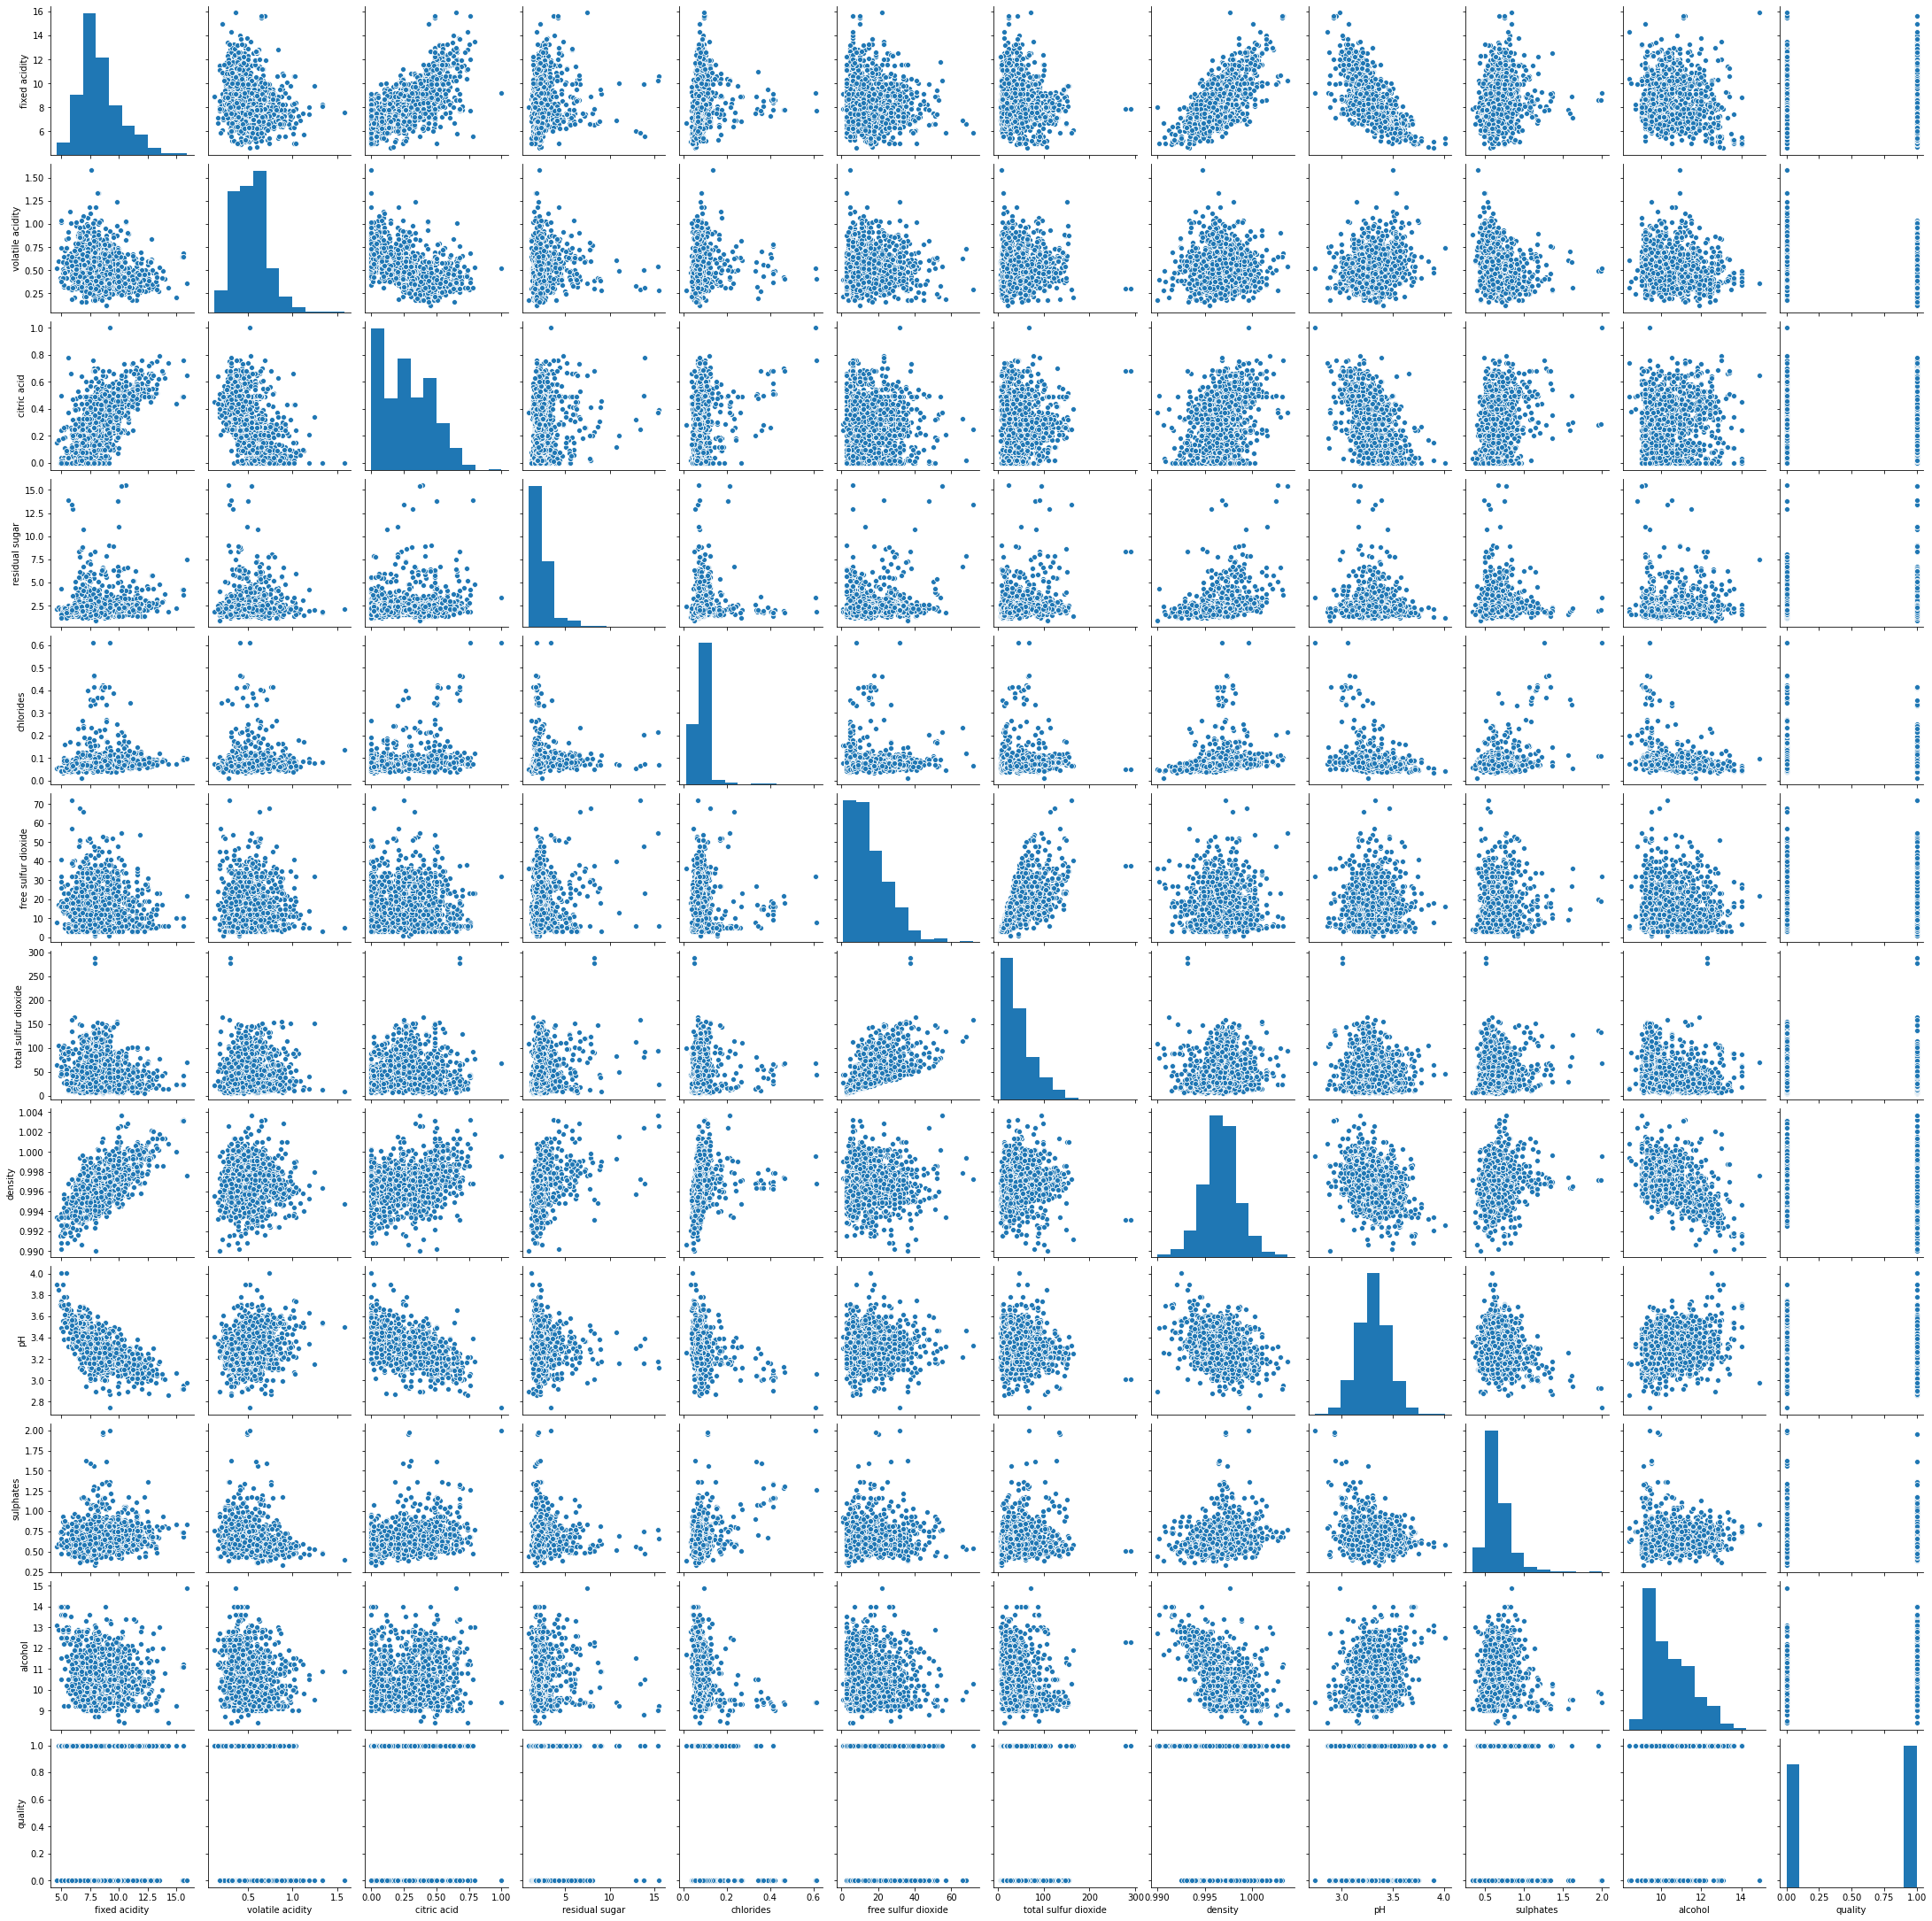

In [20]:
plt.figure(figsize=(10,15))
sns.pairplot(data)

### DATA PREPROCESSING

In [4]:
#converting the quality variable into two different categories 'good' and 'bad'
data['quality'] = data['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})

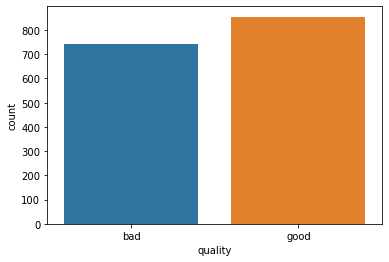

In [6]:
sns.countplot(data['quality'])

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['quality'] = le.fit_transform(data['quality'])

In [12]:
x = data.iloc[:,:11]
y = data.iloc[:,11]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

#### USING SUPPORT VECTOR CLASSIFIER

In [21]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 0.8098415346121768
Testing accuracy : 0.73


In [25]:
model2 = SVC(C = 1.4, gamma = 0.1, kernel = 'rbf')
model2.fit(x_train, y_train)
y_pred = model2.predict(x_train)
print("Testing Accuracy:",model2.score(x_test, y_test))

Testing Accuracy: 0.735


#### Using XGBOOST

In [30]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train,y_train)
print("Testing Accuracy:",model.score(x_test, y_test))

Testing Accuracy: 0.7775


#### MLP CLASSIFIER (Multi Layer Perceptron)

In [16]:
from sklearn.neural_network import MLPClassifier
# creating the model
model = MLPClassifier(hidden_layer_sizes = (100, 100), max_iter = 150)
# feeding the training data to the model
model.fit(x_train, y_train)
# calculating the accuracies
print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))

training accuracy : 0.9374478732276897
testing accuracy : 0.745


D:\anaconda\envs\tensor\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#### SEQUENTIAL MODEL

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
D:\anaconda\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [18]:
model = Sequential()
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu', input_dim = 11))
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu'))
model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 
model.fit(x_train, y_train, batch_size = 10, nb_epoch = 100)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


D:\anaconda\envs\tensor\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=8, kernel_initializer="uniform")`
  """
D:\anaconda\envs\tensor\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8, kernel_initializer="uniform")`
  
D:\anaconda\envs\tensor\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\envs\tensor\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Epoch 1/100
1199/1199 [==============================] - 0s 380us/step - loss: 0.6884 - acc: 0.5605
Epoch 2/100
1199/1199 [==============================] - 0s 87us/step - loss: 0.6212 - acc: 0.7281
Epoch 3/100
1199/1199 [==============================] - 0s 85us/step - loss: 0.5361 - acc: 0.7356
Epoch 4/100
1199/1199 [==============================] - 0s 83us/step - loss: 0.5159 - acc: 0.7440
Epoch 5/100
1199/1199 [==============================] - 0s 79us/step - loss: 0.5112 - acc: 0.7440
Epoch 6/100
1199/1199 [==============================] - 0s 81us/step - loss: 0.5091 - acc: 0.7456
Epoch 7/100
1199/1199 [==============================] - 0s 79us/step - loss: 0.5068 - acc: 0.7540
Epoch 8/100
1199/1199 [==============================] - 0s 78us/step - loss: 0.5058 - acc: 0.7531
Epoch 9/100
1199/1199 [==============================] - 0s 77us/step - loss: 0.5044 - acc: 0.7531
Epoch 10/100
1199/1199 [==============================] - 0s 78us/step - loss: 0.5036 - acc: 0.7556
Epoch 1

1199/1199 [==============================] - 0s 84us/step - loss: 0.4631 - acc: 0.7798
Epoch 81/100
1199/1199 [==============================] - 0s 76us/step - loss: 0.4624 - acc: 0.7832
Epoch 82/100
1199/1199 [==============================] - 0s 75us/step - loss: 0.4620 - acc: 0.7857
Epoch 83/100
1199/1199 [==============================] - 0s 75us/step - loss: 0.4619 - acc: 0.7848
Epoch 84/100
1199/1199 [==============================] - 0s 76us/step - loss: 0.4622 - acc: 0.7840
Epoch 85/100
1199/1199 [==============================] - 0s 77us/step - loss: 0.4616 - acc: 0.7873
Epoch 86/100
1199/1199 [==============================] - 0s 72us/step - loss: 0.4617 - acc: 0.7832
Epoch 87/100
1199/1199 [==============================] - 0s 73us/step - loss: 0.4625 - acc: 0.7865
Epoch 88/100
1199/1199 [==============================] - 0s 75us/step - loss: 0.4617 - acc: 0.7832
Epoch 89/100
1199/1199 [==============================] - 0s 75us/step - loss: 0.4613 - acc: 0.7873
Epoch 90/100


Using sequntial model we get an accuracy of around 79%